## Данные об игроках NBA 

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.cluster import DBSCAN

import matplotlib.cm as cm
from sklearn.manifold import TSNE

In [ ]:
nba = pd.read_csv("nba_2013.csv")
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [ ]:
#оставляем только числовые признаки
nba = nba[['age','g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf','pts']] 

In [ ]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,461.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,0.722419,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,0.160166,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,0.654000,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,0.751000,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,0.821000,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,1.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000


#### Расшифровка некоторых колонок:

player — name of the player

pos — the position of the player

g — number of games the player was in

gs — number of games the player started

pts — total points the player scored

ast - the total number of assists the player had in the season.

fg. - the player's field goal percentage for the season.

подробнее об остальных https://www.basketball-reference.com/about/glossary.html 

## Задание


1) Замените пропуски во всех колонках на медиану с помощью SimpleImputer  (Без этих преобразований алгоритмы кластеризации не будут работать из-за пропусков!)

In [ ]:
nba.isnull().sum(axis=0)

age      0
g        0
gs       0
mp       0
fg       0
fga      0
fg.      2
x3p      0
x3pa     0
x3p.    67
x2p      0
x2pa     0
x2p.     3
efg.     2
ft       0
fta      0
ft.     20
orb      0
drb      0
trb      0
ast      0
stl      0
blk      0
tov      0
pf       0
pts      0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy ='median')
imputer = imputer.fit(nba)
nba = imputer.transform(nba)

In [ ]:
nba

array([[  23.,   63.,    0., ...,   30.,  122.,  171.],
       [  20.,   81.,   20., ...,   71.,  203.,  265.],
       [  27.,   53.,   12., ...,   39.,  108.,  362.],
       ...,
       [  25.,   79.,   78., ...,  165.,  213., 1417.],
       [  21.,   82.,    3., ...,   87.,  170.,  490.],
       [  24.,   70.,    9., ...,   60.,  137.,  399.]])

2) Стандартизируйте все признаки с помощью MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
nba = scaler.fit_transform(nba)


In [ ]:
nba

array([[0.2       , 0.75609756, 0.        , ..., 0.10169492, 0.44688645,
        0.06594678],
       [0.05      , 0.97560976, 0.24390244, ..., 0.24067797, 0.74358974,
        0.10219823],
       [0.4       , 0.63414634, 0.14634146, ..., 0.13220339, 0.3956044 ,
        0.13960663],
       ...,
       [0.3       , 0.95121951, 0.95121951, ..., 0.55932203, 0.78021978,
        0.54647127],
       [0.1       , 0.98780488, 0.03658537, ..., 0.29491525, 0.62271062,
        0.1889703 ],
       [0.25      , 0.84146341, 0.1097561 , ..., 0.20338983, 0.5018315 ,
        0.15387582]])

Будем работать с преобразованным датасетом.

### Попробуйте кластеризовать данные при помощи KMeans

1. Постройте график инерции (кол-во кластеров от 1 до 10)

Определите по методу локтя оптимальное число кластеров

Text(0, 0.5, 'inercia')

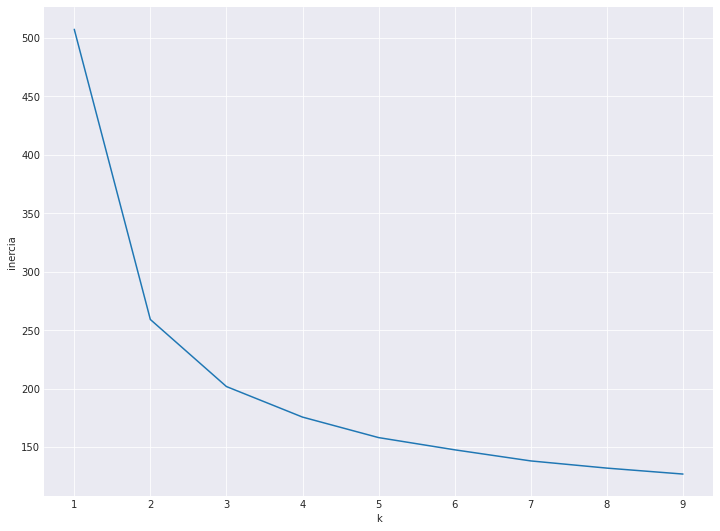

In [ ]:
inertia = []
k = range(1, 10)
for k_i in k:
    kmeans=KMeans(n_clusters=k_i,n_init=100,random_state=123)
    kmeans.fit(nba)
    inertia.append(kmeans.inertia_)
    
plt.plot(k, inertia)
plt.xlabel('k')
plt.ylabel('inercia')

2. Постройте график силуета (silhoette_score) (кол-во кластеров от 1 до 10)


[0.40983850855986453, 0.29125636778070163, 0.29217066964099253, 0.24462866076317788, 0.20088008907346733, 0.20611916258822977, 0.2063065434465122, 0.18793623030867007]


Text(0, 0.5, 'silhouette')

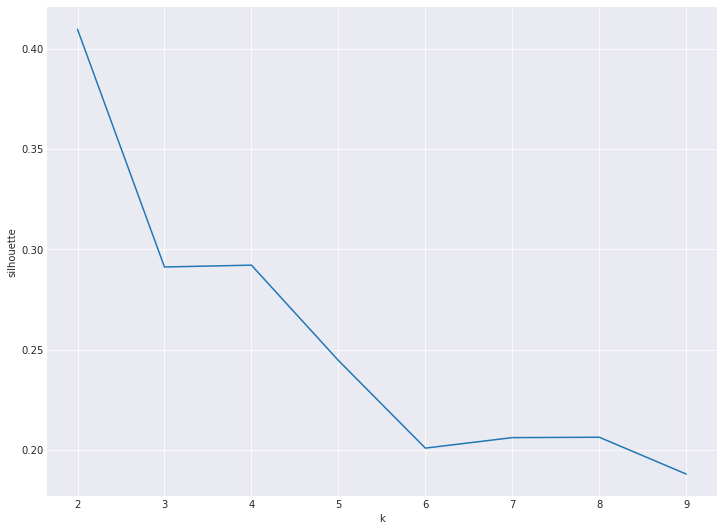

In [ ]:
from sklearn.metrics import silhouette_score
silhouette = []
k = range(2, 10)
for k_i in k:
    kmeans=KMeans(n_clusters=k_i,n_init=100,random_state=123)
    kmeans.fit(nba)
    silhouette.append(silhouette_score(nba, kmeans.labels_))
print(silhouette)
plt.plot(k, silhouette)
plt.xlabel('k')
plt.ylabel('silhouette')

3. Постройте график силуета для каждого кластера отдельно, для этого воспользуйтесь функцией clusters_stats

Пример вызова clusters_stats:

In [ ]:
def clusters_stats(n_clusters, clusters, X):
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    silhouette_avg = silhouette_score(X, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, clusters)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[clusters == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()


For n_clusters = 3 The average silhouette_score is : 0.29125636778070163


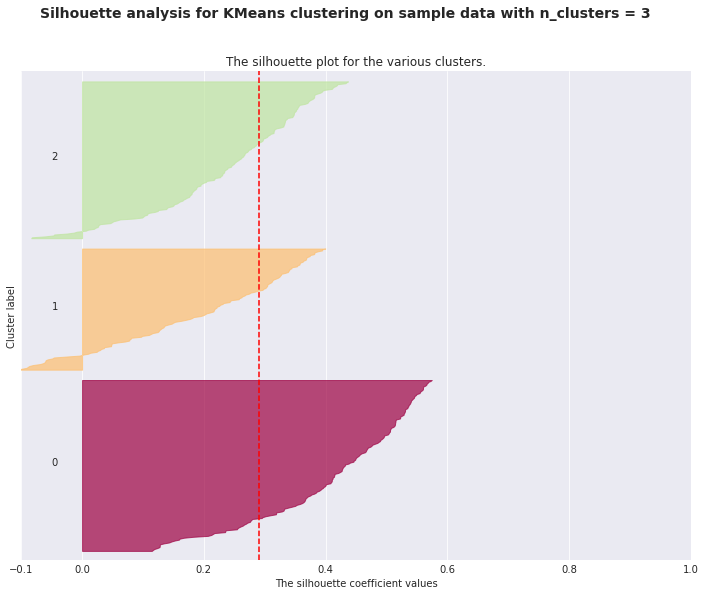

In [ ]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(nba)
clusters = kmeans.predict(nba)
clusters_stats(n_clusters, clusters,nba )

For n_clusters = 6 The average silhouette_score is : 0.20226427001747527


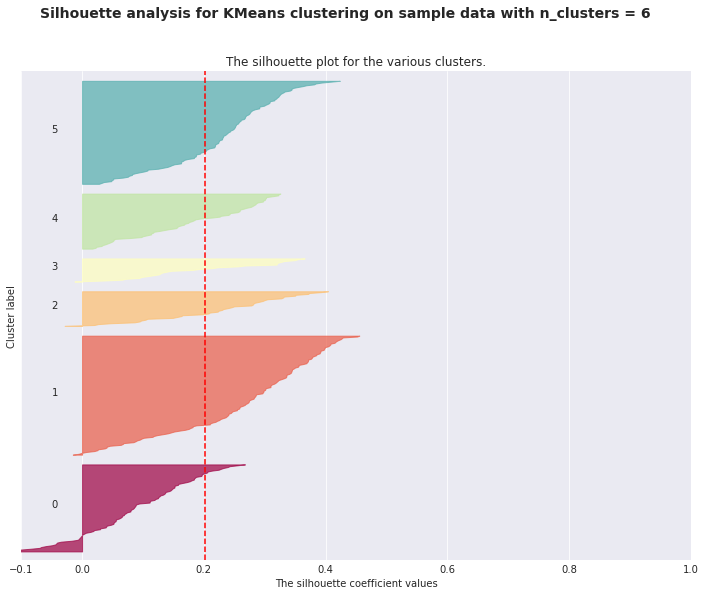

In [ ]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(nba)
clusters = kmeans.predict(nba)
clusters_stats(n_clusters, clusters,nba )

Проанализируйте полученный результат и определите оптимальное число кластеров. Чему оно равно?

4. Уменьшите количество признаков в исходном датасете nba до 2 с помощью TSNE c параметром perplexity=30. Результат запишите в таблицу tsne_representation.

In [ ]:
tsne_representation = TSNE(n_components=2, perplexity=30).fit_transform(nba)
tsne_representation

array([[ 5.21167135e+00, -4.42484808e+00],
       [ 2.60339308e+00, -7.47526789e+00],
       [ 6.64745903e+00, -5.69004869e+00],
       [-1.96597462e+01, -1.76690121e+01],
       [ 5.89787483e+00, -9.99239445e+00],
       [ 1.20996628e+01,  9.82193410e-01],
       [-2.79105244e+01, -1.06407614e+01],
       [ 4.69312620e+00, -7.32429790e+00],
       [-7.96760273e+00,  1.95137322e+00],
       [-2.63032985e+00,  8.87785625e+00],
       [-2.15291653e+01, -5.63862085e+00],
       [ 1.68913498e+01,  2.15186539e+01],
       [ 4.71624756e+00, -1.29595156e+01],
       [-6.66603947e+00,  2.87669122e-01],
       [-1.54192657e+01, -1.02582483e+01],
       [ 1.53594341e+01,  1.57885802e+00],
       [-4.70432758e+00, -7.14953756e+00],
       [-2.70503330e+01, -2.07639427e+01],
       [ 1.30342903e+01,  1.77246914e+01],
       [-8.13458800e-01,  5.05776834e+00],
       [-2.07496758e+01, -1.48754883e+01],
       [ 1.58380365e+01,  2.01124439e+01],
       [ 7.75224388e-01, -5.38643360e+00],
       [ 7.

5. Теперь обучите Kmeans еще раз задав оптимальное число кластеров. Визуализируйте полученное разбиение на преобразованном датасете tsne_representation (каждый из 2 "сжатых" признаков в таблице tsne_representation - это ось на графике). Пример визуализации:

In [ ]:
km=KMeans(n_clusters=3,n_init=100,random_state=123)
km.fit(tsne_representation)
cluster_labels=km.labels_

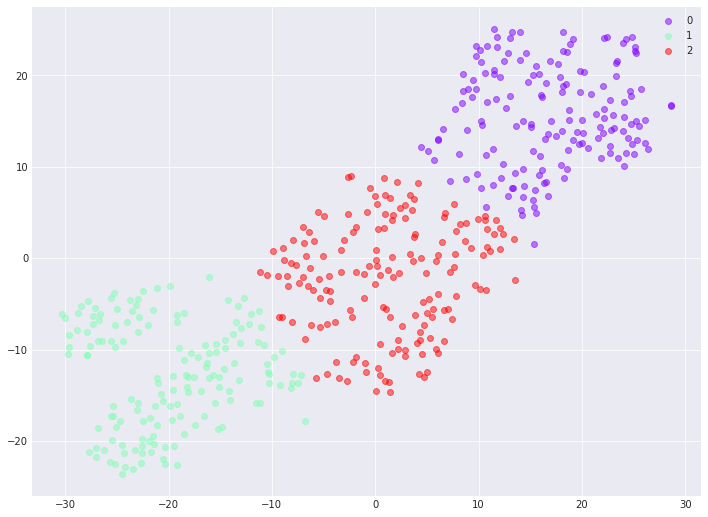

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, len(set(km.labels_))))

for y, c in zip(set(km.labels_), colors):
    plt.scatter(pd.DataFrame(tsne_representation)[0].loc[pd.DataFrame(km.labels_).values==y], 
                pd.DataFrame(tsne_representation)[1].loc[pd.DataFrame(km.labels_).values==y], color=c, alpha=0.5, label=str(y))
plt.legend()


### Теперь попробуем метод DBScan

1. Визуализируйте параметр eps в цикле для разных min_samples(от 3 до 10)

Выберите оптимальное значение min_samples и eps. Eps определите по методы локтя. Min_samples выбирайте исходя из 2 критериев: чем меньше оптимальное eps - тем лучше, чем больше точек по оси Х остается (не записывается в выбросы) - тем лучше.

Text(0, 0.5, 'e')

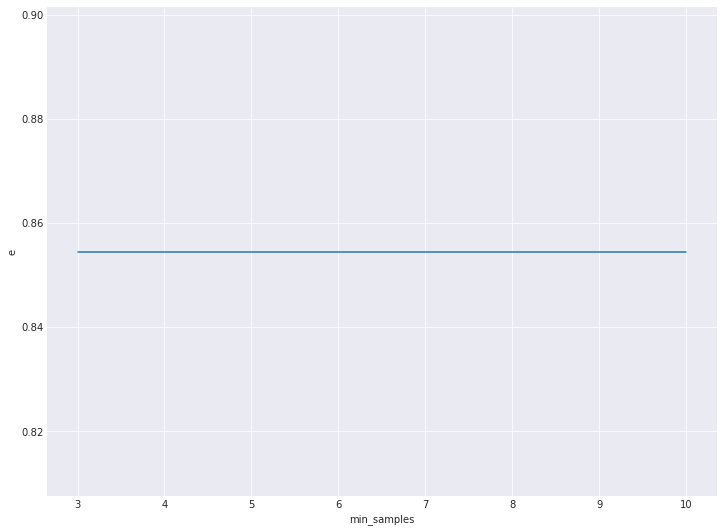

In [ ]:
from sklearn.neighbors import NearestNeighbors

e = []
min_samples = range(3, 11)
for i in min_samples:
    neigh = NearestNeighbors(n_neighbors=i)
    nbrs = neigh.fit(nba)
    distances, indices = nbrs.kneighbors(nba)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    e.append(max(distances))
plt.plot(min_samples, e)
plt.xlabel('min_samples')
plt.ylabel('e')


Проанализируйте полученный результат и определите оптимальное число кластеров. Чему оно равно?

2. Теперь обучите DBScan еще раз, задав оптимальное число кластеров. Визуализируйте полученное разбиение на преобразованном датасете tsne_representation (каждый из 2 "сжатых" признаков в таблице tsne_representation - это ось на графике). Пример визуализации:

In [ ]:
 db = DBSCAN(eps=0.855, min_samples=5).fit(tsne_representation)

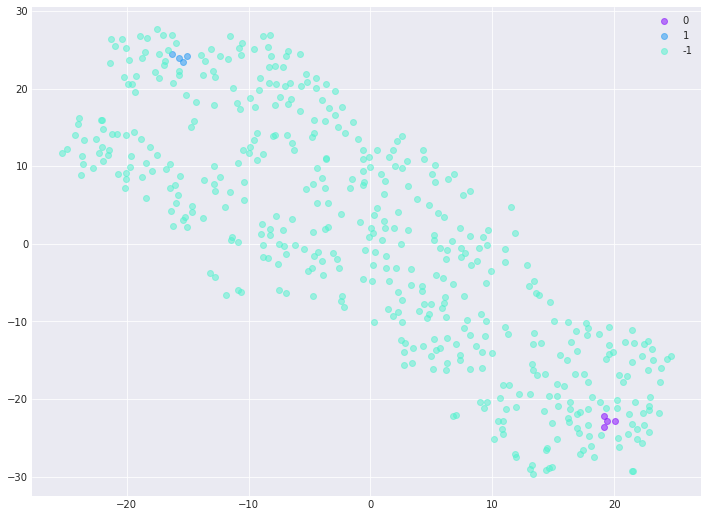

In [ ]:

colors = cm.rainbow(np.linspace(0, 1, len(set(km.labels_))))

for y, c in zip(set(db.labels_), colors):
    plt.scatter(pd.DataFrame(tsne_representation)[0].loc[pd.DataFrame(db.labels_).values==y], 
                pd.DataFrame(tsne_representation)[1].loc[pd.DataFrame(db.labels_).values==y], color=c, alpha=0.5, label=str(y))
plt.legend()
